In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample
import matplotlib.pyplot as plt


In [ ]:
# Step 1: Load the dataset
try:
    df = pd.read_csv('/content/Dataset_s_p_e.csv', encoding='ISO-8859-1')
    print("Data loaded successfully!")
except Exception as e:
    print("Error loading data:", e)

Error loading data: [Errno 2] No such file or directory: '/content/Dataset_s_p.csv'


In [ ]:
# Step 2: Check for missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# Step 3: Drop rows with missing values in 'Title' or 'Category'
df.dropna(subset=['Title', 'Category'], inplace=True)

# Step 4: Clean the 'Title' column (remove extra whitespace, lowercasing)
df['Title'] = df['Title'].apply(lambda x: x.strip().lower())

# Step 5: Verify no missing values remain
print("Missing values after cleaning:\n", df.isnull().sum())


Missing values before cleaning:
 Title       0
Category    0
link        0
dtype: int64
Missing values after cleaning:
 Title       0
Category    0
link        0
dtype: int64


Original Class Distribution:
 Category
ploitics     43
sports       37
Education    37
Name: count, dtype: int64


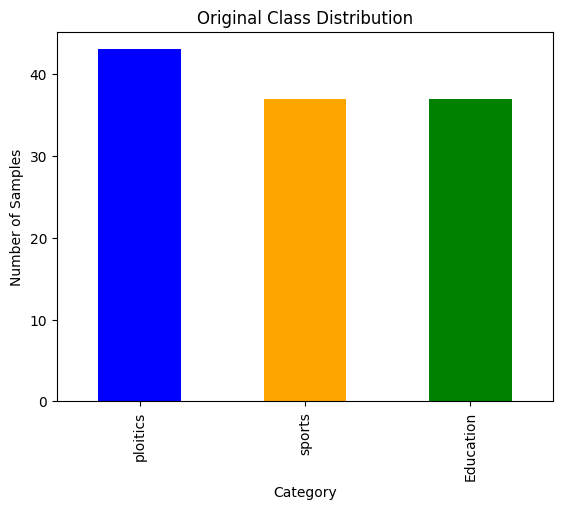

In [ ]:
# Step 6: Visualize class distribution before handling imbalance
print("Original Class Distribution:\n", df['Category'].value_counts())
df['Category'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title("Original Class Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Samples")
plt.show()

New Class Distribution:
 Category
ploitics     43
sports       37
Education    37
Name: count, dtype: int64


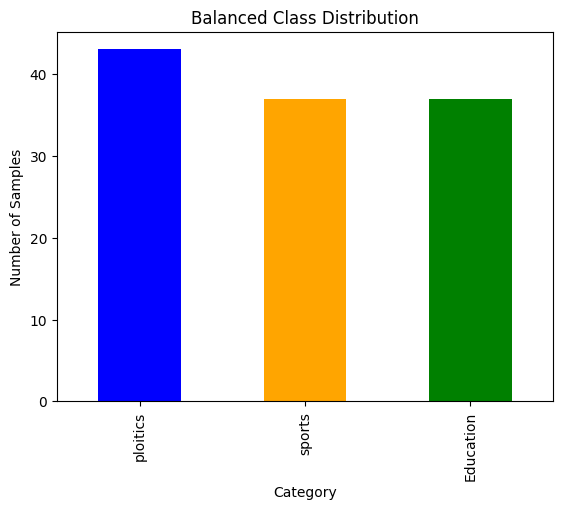

In [ ]:
# Step 7: Handle class imbalance using oversampling
# Separate classes
df_majority = df[df['Category'] != 'Education']
df_minority = df[df['Category'] == 'Education']

# Oversample the minority class (Education)
df_minority_oversampled = resample(df_minority,
                                   replace=True,     # Sample with replacement
                                   n_samples=37,     # Match the size of 'sports'
                                   random_state=42)  # Reproducibility

# Combine majority class and oversampled minority class
df = pd.concat([df_majority, df_minority_oversampled])

# Visualize the new class distribution
print("New Class Distribution:\n", df['Category'].value_counts())
df['Category'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title("Balanced Class Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Samples")
plt.show()

In [ ]:
# Step 8: Split the data into features (X) and labels (y)
X = df['Title']  # Features
y = df['Category']  # Labels

# Step 9: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Convert text data to a matrix of token counts (Bag of Words model)
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Step 11: Train the Naive Bayes model
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

# Step 12: Make predictions on the test data
y_pred = clf.predict(X_test_counts)

# Step 13: Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Politics", "Sports", "Education"]))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    Politics       1.00      0.75      0.86         8
      Sports       0.62      0.89      0.73         9
   Education       0.80      0.57      0.67         7

    accuracy                           0.75        24
   macro avg       0.81      0.74      0.75        24
weighted avg       0.80      0.75      0.75        24

Accuracy Score: 0.75
